# CHAPTER 21 - Deep Learning 
### George Tzanetakis, University of Victoria 


## WORKPLAN 

The section number is based on the 4th edition of the AIMA textbook and is the suggested
reading for this week. Each list entry provides just the additional sections. For example the Expected reading include the sections listed under Basic as well as the sections listed under Expected. Some additional readings are suggested for Advanced. 

1. Basic: Sections **21.1**, **21.2**, , and **Summary**
2. Expected: Same as Basic plus **21.3**
3. Advanced: All the chapter including bibligraphical and historical notes 

# Deep Learning

Understanding deep learing starts from the simple feed-forward netowrk with input layer, hidden layers, and output layer. Each node/unit in a layer is collected with weights to every node in the next layer. The resulting weighted sum is then processed by a nonlinear activition function to produce output. So one can think of the entire network as a sequence of applying vector-matrix multiplication followed by non-linar activations. 
We can add +1 to the input so that total weighted sum can be non-zero even when all the output of the previous layer/inputs of the current layer are all zero. 

\begin{equation}
a_j = g_j(\mathbf{w}^T \mathbf{x})
\end{equation}

where $\mathbf(w)$ is the vector of weights leading into unit $j$, and $\mathbf x$ is the vector of inputs to unit $j$. 

Activation is non-linear otherwise any composition of units would still represent a linear function. The nonlinearity is what allows sufficiently large networks of units to represent arbitrary functions. 


There are different activation functions: 

1. Logistic or sigmoid 
\begin{equation} 
\sigma(x) = 1 / (1 + e^{-x})
\end{equation} 
2. Rectified linear unit 
\begin{equation} 
ReLU(x) = max(0,x)
\end{equation} 
3. Softplus 
\begin{equation} 
softplus(x) = log(1 + e^{x})
\end{equation} 
4. tanh 


Vector form of network: 
\begin{equation} 
h_w(\mathbf x) = g^{2}(\mathbf{W}^{2}g^{1}(\mathbf W^{(1)}\mathbf x))
\end{equation} 

For supervised learning training we can use **gradient descent** i.e calculate of the gradient of the loss function with respect to the weights, and then adjust the weights along the gradient direction to reduce the loss. 

Example loss function where $y$ is the ground truth value and $\hat y$ is the output prediction of the network. 
\begin{equation} 
Loss(h_{w}) = (y-\hat y)^2
\end{equation} 

The idea is that for each training sample (or mini-batch of samples) we can calcuate the gradient with respect to the loss function and propagate the error backwards from the output layer through the hidden layers, and eventually to the input layer. This algorithm is called **back propagtion**. 


## Input encoding 

Boolean attributes are typically encoded as $0$ for False and $1$ for True. Numeric attributes whether integer 
or real-valued are typically used as is or sometimes mapped onto a log-scale. Networks used with images have array-like internal structures that aim to reflect the semantics of adjacency of pixels. Categorial values are usually encoded with **one-hot-encoding** to avoid numerical adjacency issues. 



## Output layers and loss functions 

In most deep learning applications, it is more common to interpret the output value $\mathbf{\hat y}$ as probabilities and to use the **negative log likelihood** as the loss function. 

\begin{equation} 
\mathbf{w^*} = \underset{w}{\operatorname{argmin}} - \sum_{j=1}^{N} logP_w(\mathbf{y_j}|\mathbf{x_j})
\end{equation} 

Without going into details this is called the cross-entropy loss in Deep Learning literature. 
For binary classification problems a **sigmoid output** layer will do what we want and output 
probabilities. For multiclass problems we can use a **softmax** layer which outputs a vector of non-negative 
numbers that sum up to 1. For regression problems we can use a linear output layer without any activation function. This corresponds to doing a classical linear regression at the output layer after the multiple non-linear transforms. 

## Hidden Layers 

From 1985-2010 internal nodes typically used sigmoid and tanh activation functions almost exclusively. From around 20210 onwards the ReLU and softplus become more popular, partly because they are believed to avoid the problem of vanishing gradients. Experiments suggest that deep and narrow networks learn better than shallow and wide given a fixed total number of weights. 

There is little understanding at the moment as to why some structures seem to work better than others for some particular problem. 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


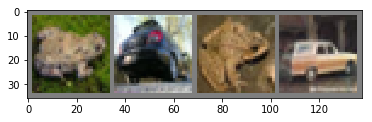

 frog   car  frog   car


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.187
[1,  4000] loss: 1.813
[1,  6000] loss: 1.629
[1,  8000] loss: 1.553
[1, 10000] loss: 1.505
[1, 12000] loss: 1.450
[2,  2000] loss: 1.384
[2,  4000] loss: 1.347
[2,  6000] loss: 1.315
[2,  8000] loss: 1.309
[2, 10000] loss: 1.284
[2, 12000] loss: 1.281
Finished Training


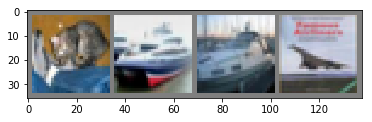

GroundTruth:    cat  ship  ship plane


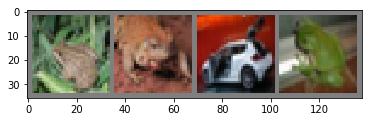

GroundTruth:   frog  frog   car  frog


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


net = Net()
net.load_state_dict(torch.load(PATH))


outputs = net(images)
_, predicted = torch.max(outputs, 1)

print(outputs)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

tensor([[-1.0141, -2.5376,  1.8859,  0.9337,  3.7884,  0.4824,  0.7467,  0.7770,
         -2.7576, -2.7843],
        [-0.2929, -0.1857,  1.2028,  0.1387,  0.5068, -0.3072,  2.2520, -1.1720,
         -0.6227, -0.8065],
        [ 0.7995, -0.2147,  2.1655,  2.1324, -0.8795,  1.3783, -3.8450,  0.6196,
         -1.0054, -1.3071],
        [ 0.4561, -0.8008,  1.7911, -0.2868,  1.0495, -1.2798,  3.0245, -2.1457,
         -0.5993, -1.0496]], grad_fn=<AddmmBackward>)
Predicted:   deer  frog  bird  frog


In [10]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

print(9*a**2)
print(a.grad)

tensor([36., 81.], grad_fn=<MulBackward0>)
tensor([36., 81.])


## Differentiation using computers 


1. Symbolic differentiation: Automatic manipulation of mathematical expressions to get derivatives
    * Input and output are mathematical expressions
    * Used in Mathematica, Maple, Sympy, etc.
    
    
    
2.  Numeric differentiation: Approximating derivatives by finite differences: 

\begin{equation} 
\frac{\partial f(x_1, \dots, x_N}{\partial x_i)} = \frac{f(x_1, \dots, x_i+h, \dots, x_N)}{2h}
\end{equation}


∂xi
f(x1, . . . , xN) = lim
h→0
f(x1, . . . , xi + h, . . . , xN) − f(x1, . . . , xi − h, . . . , xN)
2h

• Automatic differentiation (AD): A method to get exact derivatives
efficiently, by storing information as you go forward that you can reuse
as you go backwards
• Takes code that computes a function and returns code that computes the
derivative of that function.
• “The goal isn’t to obtain closed-form solutions, but to be able to write a
program that efficiently computes the derivatives.”
• Autograd, Torch Autograd

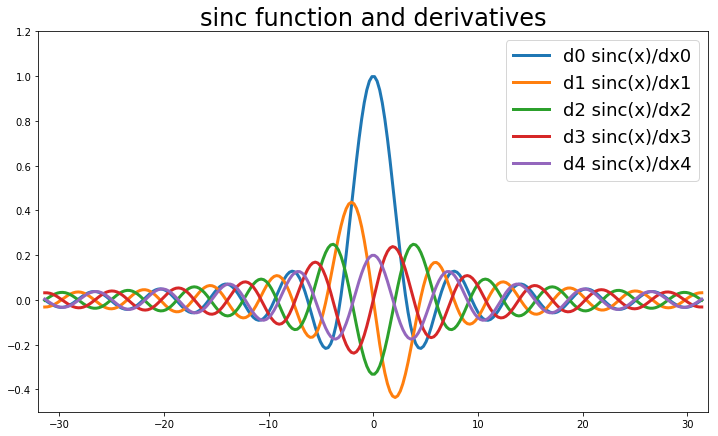

In [11]:
import autograd.numpy as np
from autograd import elementwise_grad as egrad
import matplotlib.pyplot as plt

x = np.linspace(-31.4,31.4, 256)
sinc = lambda x: np.sin(x) / x
plt.figure(figsize=(12,7))
plt.title("sinc function and derivatives", fontsize=24)
my_fn = sinc

for ii in range(5):
    plt.plot(x, my_fn(x), lw=3, label="d{} sinc(x)/dx{}".format(ii,ii))
    plt.legend(fontsize=18)
    plt.axis([-32, 32, -0.50, 1.2])
    my_fn = egrad(my_fn) 

## Differentiable programming 


The idea of computing using building blocks that can be differentiated orinated in Deep Learning but has found applications in other areas. For example it is possible to model chains of digital signal processing effects 
using differentiable DSP. 


## Convolutional neural networks 

In order to preserve local adjacency information, the first hidden layer should receive input from only a small, local region of the image. In addition, we would like approximate **spatial invariance** at small to moderate scales - i.e an edge or an eye should look the same if it appears in a different, small region of the image. 

Constraining the $l$ weights connecting a local region to a unit in the hidden layer to be the same for each hidden unit (i.e $w_{1,i}, \dots w_{l,i}$ should be the same as $w_{1,j}, \dots, w_{l, j}$ for hidden unit $i$ and $j$. A pattern of weights that is replicated across multiple local regions is called a **kernel** and the process of applying the **kernel** to the pixels of an image is called **convolution**. Note that in DSP this is called cross-correlation and convolution means something else. 

Let's illustrate **convolution** with an example in 1D. Consider the sequence $5,6,6,2,5,6,5$ and the **kernel** 
$+1,-1,+1$. This kernel will detect (produce higher values) when there is a "dark" pixel. The result of applying 
the kernel at the first position of the sequence will be: $5-6+6 = 5$. The kernel is then moved by **stride** pixels. For example if the **stride** is two the next output value will be $6-2+5=9$. If the stride is one the next output value will be $6-6+2=2$. 

Convolution is a linear operation and therefore we can propagate gradients through it, just like we did with fully connected networks. 


CNNs were inspired originally by models of the visual cortex proposed in neuroscience. In those models, the **receptive field** of a neuron is the portion of the sensory input that can affect that neuron's activation. 

In [ ]:
# Example of 1D convolution with kernel size 3 and stride 2 

a = np.array([[+1,-1,+1,0,0,0,0],[0,0,+1,-1,+1,0,0], [0,0,0,0,+1,-1,+1]])

b = np.array([[5,6,6,2,5,6,5]])
c = np.matmul(a,b.T)
print(a)
print(b.T)
print('=')
print(c)


## Pooling layer 

A **pooling** layer in a neural network summarizes a set of adjacent units from the preceding layer with a single value. **Average-pooling** computes the average value of its $l$ inputs. Average pooling facilitates multiscale recognition. It also reduces the number of weights required in subsequent layers, leading to lower computational cost and prossibly faster learning. **Max pooling** computes the maximum value of its $l$ inputs. Max-pooling acts as a kind of logical disjunction, saying that a feature exists somewhere in the unit's receptive field. 

In a image classification network the final layer of the network will be a softmax with $c$ output units. The early layers of the CNN are image-sized, so somewhere in between there must be significant reductions in layer size. Convolutional layers and pooling layers with stride larger than 1 all serve to reduce a layer size. 


### Tensors 

Multi-dimensional arrays of any dimension - they keep track of the "shape" of the data as it progress through layers of the network. Describing the CNN in terms of tensors and tensor operators, a deep learning package can generate compiled code that is highly optimized for the underlying computational substrate. 


Support we are traying on $256 \times 256$ RGB images with a minibatch size of $64$. The input will be a 4-dimensional tensor of size $256 \times 256 \times 3 \times 64$. The we applyu 96 kernel of size $5 \times 5 \times 3$ with a stride of $2$ in both $x$ and $y$ dimensions. This gives as an output tensor of size 
$128 \times 128 \times 96 \times 64$. Such a tensor is called a **feature map** - note no dedicated color 
channels but color information has been incorporated if the learning algorithm finds it useful for the final 
predictions of the network. 

Graphical Processing units (GPUs) are specialized hardware for graphics operations that can be used 
to perform tensor operations. Tensor processing units (TPUs) are specialized hardware for computing tensor 
operations that optimize for speed and throughput rather than high numerical precision. 

### Residual networks 

In 2012 it was shown for the first time that a DNN (AlexNet) with 8 neural network layers (5 convolutional and 3 full-connected) was more successful than traditional, hand-crafted feature learning on ImageNet. The success of DNNs is found in these additional layers. It is thought that these layers progressively learn more complex features (for example the first layer might learn edges, the second layer might learn shapes, the third layer might learn objects, etc). 

Networks with many layers suffer from the vanishing/exploding gradient problem. Some of that can be alleviated by batch normalization. Another approach is to user residual blocks that contain skip connections. Skip connection append the output of a layer (with a potential dimension adjustment) by concatenating it with output of subsequent layers. 

The authors of the ResNet architecture test their network with 100 and 1,000 layers on the CIFAR-10 dataset. They tested on the ImageNet dataset with 152 layers, another very popular Deep CNN architecture.





## Learning Algorithms 


Standard gradient descent with $\alpha$ learning rate. The loss L is defined with respect to the entire training set. 

\begin{equation} 
\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_{w} L(\mathbf w)
\end{equation} 

Stochastic Gradient Descent (SGD), the loss $L$ is defined with respect to a minibatch of $m$ examples chosen randomly at each step. 

Empirical considerations: 

1. Small-mini batch size helps escape small local minima and computational cost of each weight update is a small constant, independent of training set size. 
2. The gradient contribution of each training example in the SGD minibatch can be computed independently, the minibatch size is often chosen so as to take maximum advantage of hardware parallelism in GPUs or TPUs. 
3. Learning rate needs to decrease over time. Choosing the right schedule is usually a matter of trial and error. 
4. Care must be taken to mitigate numerical instabilities that may arise due to overflow, underflow, and rounding error. 

Process of learning stops when there are diminishing returns. 


### Batch normalization 

### Generalization 

Approaches to improving generalization in deep learning include: 

1. Choosing the right architecture, varying number of layers, connectivity, and types of nodes 
2. Penalizing large weights 
3. Randomly perturing the values passing through the network during training 
4. Data augmentation

Deeper (and narrow) networks tend to do better than shallow and wide networks for the same number of weights. 
Deep learning works well with high-dimensional data such as images, video, speech. They have to a large extent 
replaced preprocessing approaches that extracted features that prevailed prior to 2010. 

**Weight decay** encourages weights to become small in some ways enforcing **reguralization** i.e limiting the complexity of the model. 

**Dropout** 

At each step of training, dropout applies one step of back-propagation learning to a new version of the network that is created by deactivating a randomly chosen subset of the units. 

1. Introduce noise that provides robustness
2. Approximation of large ensemble of thinned networks 
3. Paying attention to all features of the example rather than focusing on just a few 

Usually makes it harder to fit the training set, it is usually necessary to use a larger model and to train it for more iterations. 


**Data augmentation** 

Provide multiple version of the same input (for example for images: add noise, crop, rotate, scale) to increase the size of the training data and the robustness to the various transformations applied. 






### Graduate student descent 

Incremental exploratory work carried out by graduate students to figure out which architectures 
work best for which problems. 




## Recurrent neural networks 

Recurrent neural networks (RNNs) are distinct from feedforward networks in that they allow cycles in the computational graph. Each cycle has a delay i.e units may take as input a value computed from their own output at an earlier steop in the computation. This allows the RNN to have internal state or **memory**.  



## Unsupervised learning and transfer learning 


Unsupervised learning: 

1. Representation learning 
2. Generative modeling 


Joint model $P_w(\mathbf x,\mathbf z)$, where $\mathbf z$ is a set of latent, unobserved variables that represent the content of the data $\mathbf x$ in some way. 

A learned probability model achieves both representation learning (it has constructed meaningful $z$ vectors from the raw $\mathbf x$ vectors) and generative modelingL if we integrate $\mathbf z$ out of $P_{w}(\mathbf x,\mathbf z)$ we obtain $P_{w}(\mathbf x)$. 


1. Probabilistic PCA 
2. Autoencoders 
3. Deep autoregressive models 
4. Generative adversarial networks 
5. Unsupervised translation 
6. Transfer learning and multitask learning 


